In [2]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline


In [3]:
# Load datasets into DataFrames
customers = pd.read_csv('/Customers.csv')
products = pd.read_csv('/Products.csv')
transactions = pd.read_csv('/Transactions.csv')

# Preview the datasets
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [4]:
# Check for missing values
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())

print("\nMissing values in Products dataset:")
print(products.isnull().sum())

print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for duplicates
print("\nDuplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())



Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicates in Customers dataset: 0
Duplicates in Products dataset: 0
Duplicates in Transactions dataset: 0


In [5]:
# Merge datasets to create a unified view
merged_data = transactions.merge(customers, on='CustomerID', how='left') \
                          .merge(products, on='ProductID', how='left')

# Preview the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Sp

<ipython-input-6-321b2de9fe8f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


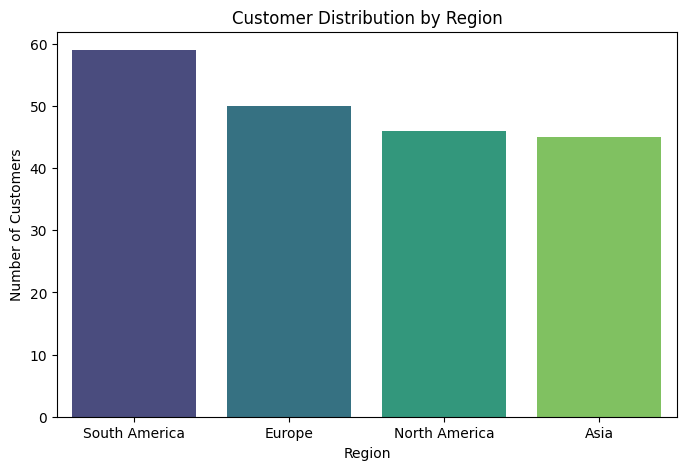

In [6]:
# Region distribution
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-7-16497077b911>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


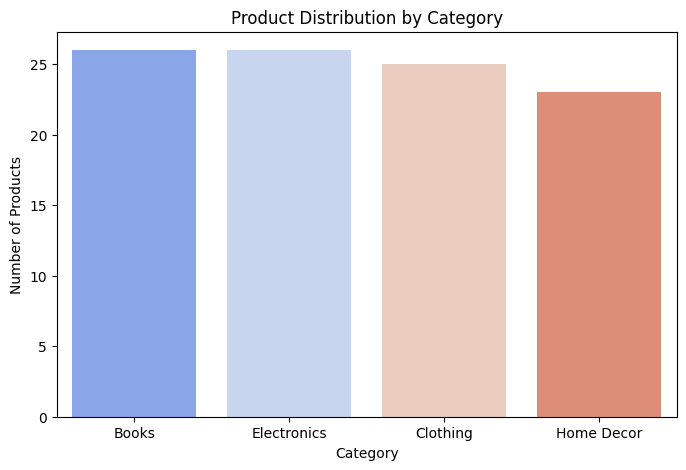

In [7]:
# Product category distribution
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


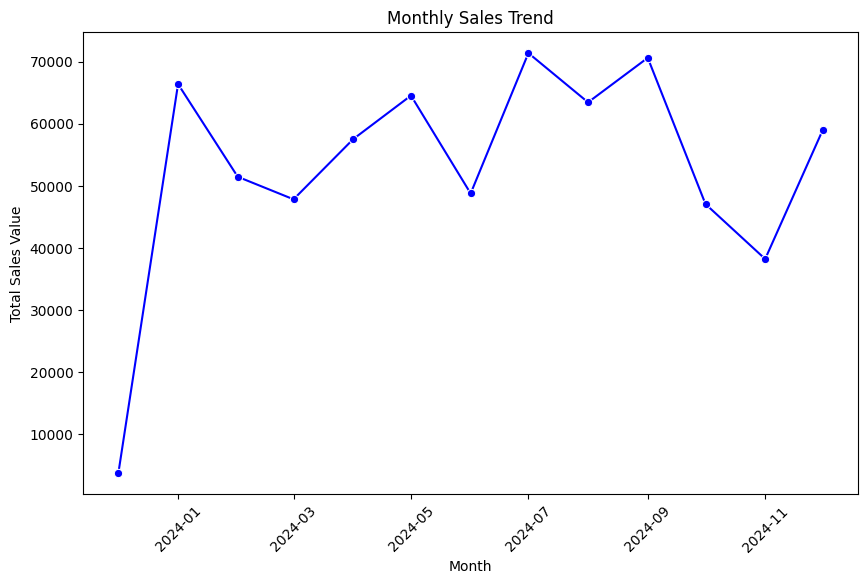

In [9]:
# Extract the month and year for better compatibility
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M').astype(str)

# Calculate monthly sales
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Sort by date for proper visualization
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'], format='%Y-%m')
monthly_sales = monthly_sales.sort_values('Month')

# Plot the sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales, marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


<ipython-input-10-c98967774c10>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


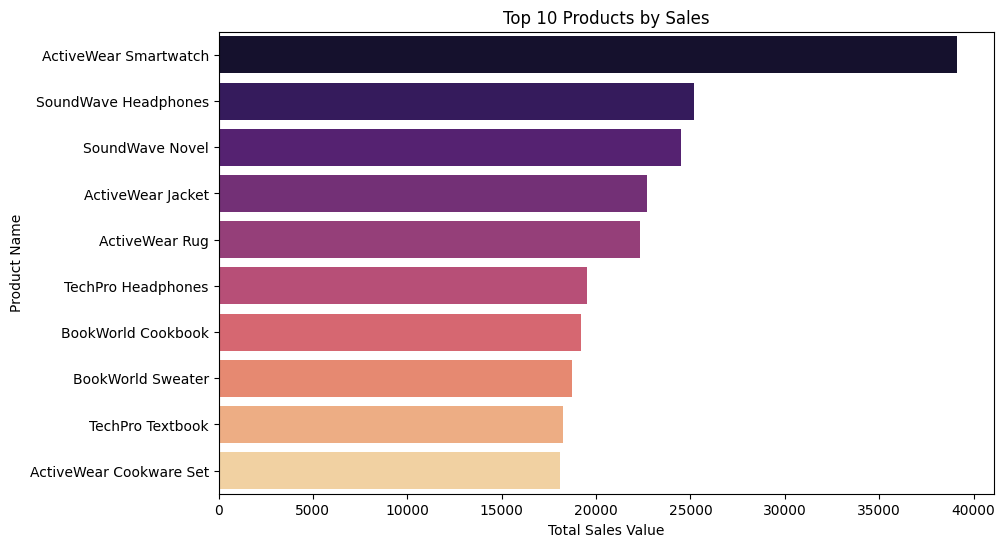

In [10]:
# Top 10 products by total sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Name')
plt.show()


In [16]:
# Save the cleaned and merged dataset
merged_data.to_csv('Cleaned_Merged_Data.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Merged_Data.csv'")

merged_data.head()


Cleaned dataset saved as 'Cleaned_Merged_Data.csv'


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


Lookalike model completed and saved to Lookalike.csv


,CustomerID,Lookalike_CustomerID,Similarity_Score
0,C0001,C0056,0.930427
1,C0001,C0152,0.986905
2,C0001,C0137,0.996332
3,C0002,C0010,0.999182
4,C0002,C0199,0.999347
